## Multiclass Classification - Iris Dataset

In this notebook we perform multiclass classification using K Nearest Neighbors (K-NN) model.


### Dataset

We will use the iris dataset, which is a multivariate data set. 

This is a famous dataset that contains the sepal and petal length and width of 150 iris flowers of three different species: Iris-Setosa, Iris-Versicolor, and Iris-Virginica

There are 4 features: 
- sepal length (cm)
- sepal width (cm)
- petal length (cm)
- petal width (cm)

Total number of samples: 150

The target (label) is coded as follows:
- Setosa: 0
- Versicolor: 1
- Virginica: 2


The dataset is also known as Fisher's Iris data set as it was introduced by the British statistician and biologist Ronald Fisher in his 1936 paper "The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis".


<img src="https://cse.unl.edu/~hasan/IrisFlowers.png",width=800,height=400>



## Goals
- Learn to use suitable performance measures
- Learn to do cross-validation
- Learn to do model selection via hyperparameter tuning


In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## Load Data

First load the data and explore the feature names, target names, etc.

In [2]:
iris = datasets.load_iris()

# See the key values
print(list(iris.keys()))

# The feature names
print(list(iris.feature_names))

# The target names
print(list(iris.target_names))

# The target values (codes)
print(list(iris.target))

['feature_names', 'filename', 'data', 'target_names', 'DESCR', 'target']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa', 'versicolor', 'virginica']
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


## Create the Data Matrix and the Target Vector

In [3]:
# Data Matrix
X = iris["data"]

# Target Vector
y = iris["target"] 

print(X.shape)
print(y.shape)

(150, 4)
(150,)


## Create Train and Test Dataset

In [4]:
# Spilt the dataset into training and test dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

## Create the K-NN Model & Vary K

We will create the K-NN model and fit the training data on the model.

### Choose optimum K

We determine the optimum K by evaluating the K-NN model for various values of K. 

The K-NN model is evaluated by computing a performance measure. There are various performamce measures for classification problems.

The sklearn KNeighborsClassifier model uses, by default, "accuracy" as the performance measure. However, in a skewed dataset, accuracy doesn't provide a good estimate of the performance of the model. We will have to use confusion matrix, precision, recall, f1 score, etc.

But for now, let's use KNeighborsClassifier's default accuracy score function to evalute the model's performance for various values of K.

In [5]:
# Set the the range of K 
neighbors = np.arange(1, 40)

# Two arrays to store training and test accuracies
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model
    knn.fit(X_train, y_train)
    
    
    # The "score" function returns the mean accuracy on the given train/test data and labels.
    # Note that "accuracy" may not be a good performance measure in a skewed data set
    # Thus, we need to do hyperparameter tuning by using better performance measures (e.g., f1 score, presision, recall)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    # Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 
    

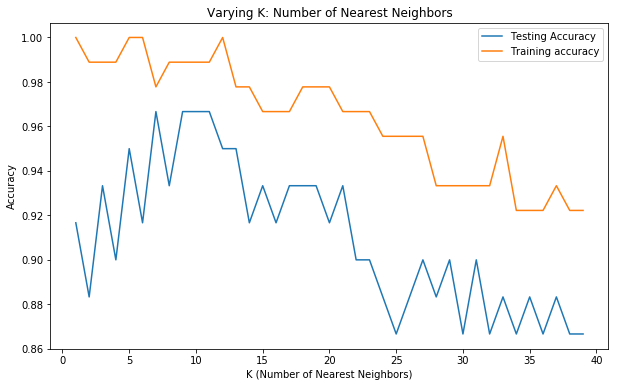

In [6]:
fig = plt.figure(figsize=(10, 6))
plt.title('Varying K: Number of Nearest Neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('K (Number of Nearest Neighbors)')
plt.ylabel('Accuracy')
plt.show()

# Determine the Opimum K 

From the above diagram, find the the value of K that gives maximum accuracy on the test data.


#### <font color=red>A better alternative for finding optimal K is to perform model selection via cross validation.</font>

## Model Selection: Hyperparameter Tunining


A K-NN model is defined by a set of parameters: nearest neighbors (K), distance metric (p), etc. These are called hyperparameters.

We need to select the best model based on the optimal values of these hyperparameters. This process is called hyperparameter tuning.

The best way to do hyperparameter tuning is to use cross-validation.

We will use Scikit-Learn’s GridSearchCV to search the combinations of hyperparameter values that provide best performance.

We need to tell which hyperparameters we want the GridSearchCV to experiment with, and what values to try out. It will evaluate all the possible combinations of hyperparameter values, using cross-validation. 


## Important:

The GridSearchCV takes an argument to define the scoring metric (performance measure). 

See the list of possible scoring functions:
https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

For multiclass classification, we may use "f1_micro" scoring function. The f1_micro function is the average of the F1 score of each class with weighting depending on the average parameter.

In the binary classification, f1 score function can be used. We may also use the precision, recall, roc_auc functions.



### Note: Experimenting with the Mahalanobis Distance Metric

Note that we cannot use the Mahalanobis distance metric as a parameter for the grid search.

Because for each iteration of the cross-validation, a new train fold is created which requires to compute the inverse of its covariance matrix.

With the sklearn grid search we cannot compute the inverse of the covariance matrix dynamically for each training fold.

Thus, unfortunately, we can't experiment with the Mahalanobis distance metric using the grid search.

In [7]:
%%time

warnings.filterwarnings('ignore')

# The param_grid tells Scikit-Learn to evaluate all combinations of the hyperparameter values
param_grid = {'n_neighbors': np.arange(1,50), 'p': [1, 2, 10, 50, 100, 500, 1000], 
              'weights': ["uniform", "distance"]}

knn = KNeighborsClassifier()

knn_cv = GridSearchCV(knn, param_grid, scoring='f1_micro', cv=5)
knn_cv.fit(X_train, y_train)

params_optimal_knn = knn_cv.best_params_

print("Best Score: %f" % knn_cv.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal_knn)
print("\n")

Best Score: 1.000000
Optimal Hyperparameter Values:  {'weights': 'uniform', 'p': 10, 'n_neighbors': 4}


CPU times: user 18.1 s, sys: 606 ms, total: 18.7 s
Wall time: 16.2 s


## Select The Best Model 

Using the optimal hyperparameter values, create the best model.
Then, fit the model.

In [8]:
knn = KNeighborsClassifier(**params_optimal_knn)
knn.fit(X_train, y_train) 

y_train_predicted = knn.predict(X_train)

train_accuracy_knn = np.mean(y_train_predicted == y_train)
print("\nTraining Accuracy: ", train_accuracy_knn)


Training Accuracy:  1.0



## Evaluate Model Performance Using Cross-Validation

Evaluate the model's performance using cross-validation. 

Use Scikit-Learn's cross_val_score function. 

Note that the "scoring" argument should be set based on the type of classification (binary/multiclass).


### Benefit of Using Cross-Validation:

Cross-validation allows us to get not only an estimate of the performance of our model, but also a measure of how precise this estimate is (i.e., its standard deviation). 

We would not have this information if we just used one validation set. 

But cross-validation comes at the cost of training the model several times, so it is not always possible.

In [9]:
# Scoring Parameter for Classification:
# https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
# Note: For a skewed data set "accuracy" might not be a good choice for scoring
scores = cross_val_score(knn, X_train, y_train, scoring='f1_micro', cv=5)
print(scores)

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[1. 1. 1. 1. 1.]
Accuracy: 1.00 (+/- 0.00)


## Evalute The Model Using Confusion Matrix for Training Data


We use the cross_val_predict() function to performs cross-validation, 

However, unlike cross_val_score, it doesn't return the evaluation scores.

Instead it returns the predictions made on each test fold. 

This means that we get a clean prediction for each instance in the training set.

By “clean” we mean that the prediction is made by a model that never saw the data during training).

In [10]:
y_train_pred = cross_val_predict(knn, X_train, y_train, cv=5)
confusion_matrix(y_train, y_train_pred)

array([[34,  0,  0],
       [ 0, 27,  0],
       [ 0,  0, 29]])

## Evaluate The Model Using Test Data

The KNeighborsClassifier model has a default "score" function that computes the accuracy of the model.

Often times the accuracy is not a good measure.

We also create the confusion matrix for the test data.

In [11]:
# The accuracy of the model
test_accuracy_knn = knn.score(X_test, y_test)
print("\nTest Accuracy: ", test_accuracy_knn)


# No. of Correct Predictions
y_test_predicted = knn.predict(X_test)
print("\nNo. of correct predictions (Test): %d/%d" % (np.sum(y_test_predicted == y_test), len(y_test)))



# Confusion Matrix
print("\nConfusion Matrix (Test Data):\n", confusion_matrix(y_test, y_test_predicted))


Test Accuracy:  0.9

No. of correct predictions (Test): 54/60

Confusion Matrix (Test Data):
 [[16  0  0]
 [ 0 22  1]
 [ 0  5 16]]


## Confusion Matrix for Test Data

Using pandas crosstab, we create a better visualization of the confusion matrix.

In [12]:
pd.crosstab(y_test, y_test_predicted, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,2,All
True,,,,
0,16,0,0,16
1,0,22,1,23
2,0,5,16,21
All,16,27,17,60


## Summary of Classification Metrics

We can build a text report showing the main classification metrics.

In [13]:
print(classification_report(y_test,y_test_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.81      0.96      0.88        23
           2       0.94      0.76      0.84        21

   micro avg       0.90      0.90      0.90        60
   macro avg       0.92      0.91      0.91        60
weighted avg       0.91      0.90      0.90        60

